In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
dataset = pd.read_csv("C:/Users/eshaa/AppData/Local/Temp/43542429-f0c5-4411-a429-15f56433ab5e_archive (4).zip.b5e/labeled_data.csv")


In [13]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [17]:
dataset.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [23]:
dataset.describe();

In [27]:
dataset["labels"] = dataset["class"].map({0:"hate-speech",
                                         1:"offesive_language",
                                         2:"neither"})


In [29]:
dataset


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,neither
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offesive_language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offesive_language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offesive_language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offesive_language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offesive_language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",neither
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,offesive_language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,offesive_language


In [31]:
import re
import nltk
import string

In [35]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
stemmer = nltk.PorterStemmer()

In [37]:
def clean_data(text):
    text = str(text).lower()
    text = re.sub('https?://\S+|www\S+' , '', text)
    text = re.sub('[#@><>.;]' , '' , text)
    text = re.sub('\n' , '', text)
    text = re.sub('\w*\d\w* ' , '', text)
    text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\w'
C:\Users\eshaa\AppData\Local\Temp\ipykernel_21748\4190670647.py:3: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\S+' , '', text)
C:\Users\eshaa\AppData\Local\Temp\ipykernel_21748\4190670647.py:6: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w* ' , '', text)


In [39]:
data = dataset[["tweet", "labels"]]

In [41]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,neither
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offesive_language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offesive_language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offesive_language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offesive_language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offesive_language
24779,"you've gone and broke the wrong heart baby, an...",neither
24780,young buck wanna eat!!.. dat nigguh like I ain...,offesive_language
24781,youu got wild bitches tellin you lies,offesive_language


In [43]:
data["tweet"] = data["tweet"].apply(clean_data)

C:\Users\eshaa\AppData\Local\Temp\ipykernel_21748\1832165696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean_data)


In [44]:
data


,tweet,labels
0,rt mayasolov woman shouldnt complain clean ho...,neither
1,rt mleew17 boy dat coldtyga dwn bad cuffin da...,offesive_language
2,rt urkindofbrand dawg rt 80sbaby4lif ever fuc...,offesive_language
3,rt cganderson vivabas look like tranni,offesive_language
4,rt shenikarobert shit hear might true might f...,offesive_language
...,...,...
24778,you muthafin lie 8220lifeask coreyemanuel righ...,offesive_language
24779,youv gone broke wrong heart babi drove redneck...,neither
24780,young buck wanna eat dat nigguh like aint fuck...,offesive_language
24781,youu got wild bitch tellin lie,offesive_language


In [47]:
x = np.array(data["tweet"])
y = np.array(data["labels"])

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [59]:
cv = CountVectorizer()
x = cv.fit_transform(x)

In [61]:
x

<24783x32100 sparse matrix of type '<class 'numpy.int64'>'
	with 206268 stored elements in Compressed Sparse Row format>

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state = 42)

In [67]:
x_train

<16604x32100 sparse matrix of type '<class 'numpy.int64'>'
	with 138298 stored elements in Compressed Sparse Row format>

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [75]:
y_pred = dt.predict(x_test)

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [79]:
cm

array([[ 149,   35,  281],
       [  37, 1114,  228],
       [ 218,  191, 5926]], dtype=int64)

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

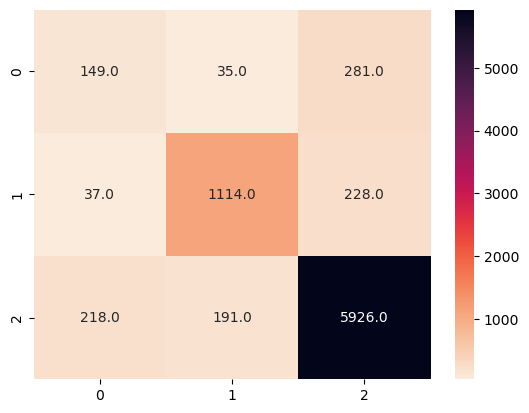

In [83]:
sns.heatmap(cm, annot=True, fmt=".1f", cmap="rocket_r")
##darker the diagonal elements, accurate the detection is, fmt is for float/decimal value notation

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test, y_pred)

pre = precision_score(y_test, y_pred, average='weighted')  # Use 'micro' or 'macro' as needed
rec = recall_score(y_test, y_pred, average='weighted')  # Use 'micro' or 'macro' as needed
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'micro' or 'macro' as needed

acc, pre, rec, f1

(0.8789583078615968,
 0.8744137157014359,
 0.8789583078615968,
 0.8765169554786767)